In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [29]:
help(csv.reader)

Help on built-in function reader in module _csv:

reader(...)
    csv_reader = reader(iterable [, dialect='excel']
                            [optional keyword args])
        for row in csv_reader:
            process(row)
    
    The "iterable" argument can be any object that returns a line
    of input for each iteration, such as a file object or a list.  The
    optional "dialect" parameter is discussed below.  The function
    also accepts optional keyword arguments which override settings
    provided by the dialect.
    
    The returned object is an iterator.  Each iteration returns a row
    of the CSV file (which can span multiple input lines).



In [7]:
def get_data(filename):
    with open(filename) as f:
        csv_reader = csv.reader(f)
        csv_reader = list(csv_reader)
    number_of_vnfs = [x[0] for x in csv_reader[1:]]
    process_time = [x[1:11] for x in csv_reader[1:]]
    memory_usage = [x[11:21] for x in csv_reader[1:]]
    memory_usage_ps = [x[21:31] for x in csv_reader[1:]]

    process_time = [list(map(float, x)) for x in process_time]
    process_time = [np.mean(x) for x in process_time]

    memory_usage = [list(map(int, x)) for x in memory_usage]
    memory_usage = [np.mean(x) for x in memory_usage]

    memory_usage_ps = [list(map(int, x)) for x in memory_usage_ps]
    memory_usage_ps = [np.mean(x) for x in memory_usage_ps]
    return number_of_vnfs, process_time, memory_usage, memory_usage_ps

In [15]:
t_5g = get_data("results_eu.5gtango_valid_level_t.csv")
skip_5g = get_data("results_eu.5gtango_valid_level_skip.csv")

t_osm = get_data("results_eu.etsi.osm_valid_level_t.csv")
skip_osm = get_data("results_eu.etsi.osm_valid_level_skip.csv")
skip_osm[-1]

FileNotFoundError: [Errno 2] No such file or directory: 'results_eu.5gtango_valid_level_t.csv'

In [21]:
def plot_pt_mu(n, pt, mu, mu_ps):
    plt.plot(n, pt)
    plt.show()
    plt.plot(n, mu)
    plt.show()
    plt.plot(n, mu_ps)
    plt.show()
skip_osm[-2][0], skip_osm[-1][0]/(1000)

(39225.2, 40166.604799999994)

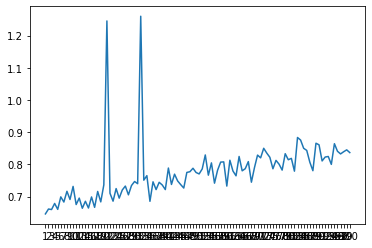

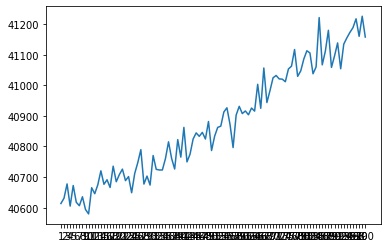

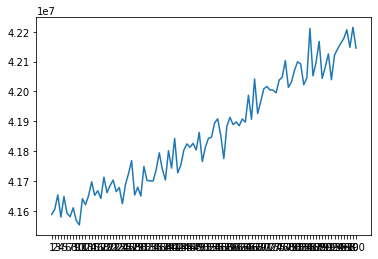

In [10]:
plot_pt_mu(*t_5g)

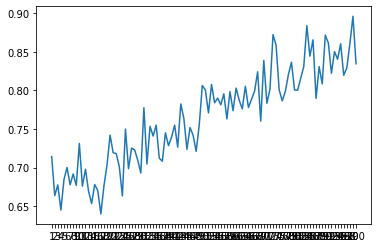

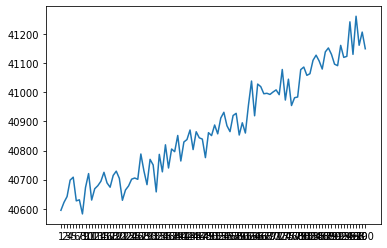

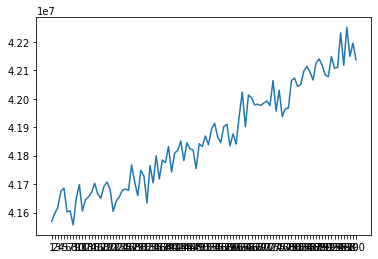

In [11]:
plot_pt_mu(*skip_5g)

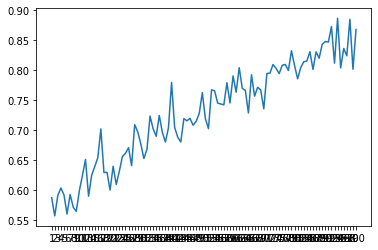

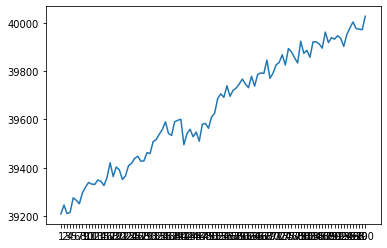

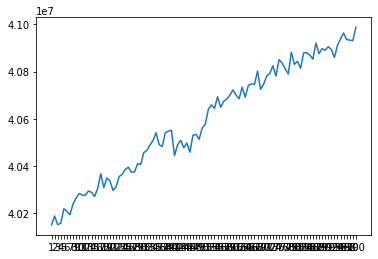

In [12]:
plot_pt_mu(*t_osm)

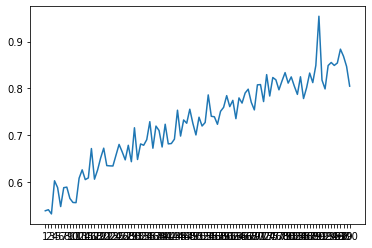

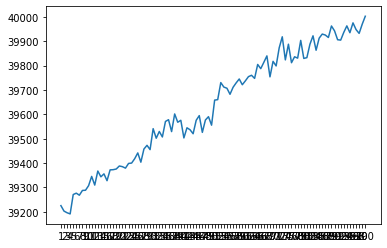

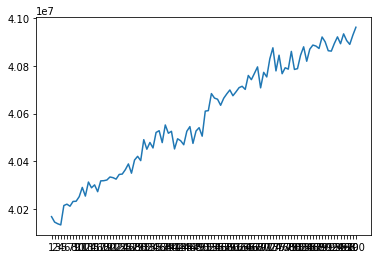

In [14]:
plot_pt_mu(*skip_osm)